# Deep Learning Assignment 1

### Name: Jason Joachim Carvalho
### Student ID: 24233446

# Sample Functions Given

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [140]:
# Function to load dataset from CSV file
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values  # Features (x1, x2, x3...)
    y = data.iloc[:, -1].values   # Labels (y)
    return X, y

# Part 1:

### Loading the Datasets

In [143]:
# Dataset Paths
linearly_separable_path = "Datasets/D2_linearly_separable.csv"
non_linearly_separable_path = "Datasets/D1_non_linearly_separable.csv"
features_3d_path = "Datasets/D3_3d_features.csv"

# Load datasets
X1, y1 = load_dataset(linearly_separable_path)
X2, y2 = load_dataset(non_linearly_separable_path)
X3, y3 = load_dataset(features_3d_path)



# Task 1:

### Logistic Regression:
Logistic Regression is a supervised machine learning algorithm primarily used for classification tasks. The objective of a logistic regression model is to identify a decision boundary (a line or hyperplane) that effectively separates the classes. The model typically consists of an input layer, one or more hidden layers, and an output layer. A linear combination of the input features is passed through the hidden layer, where it is transformed by an activation function. The resulting output is then classified based on the activation at the output layer, which produces the predicted class label.


In [146]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        m = len(y_true)
        y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)  # Avoid log(0) errors
        loss = - ((1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        return loss


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        for epoch in range(self.epochs):
            linear_function = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_function)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return self

    def predict_proba(self, X):
        linear_function = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_function)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


The logistic regression function created takes in 2 parameters - learning rate and the number of epochs.

We initialize the weights and biases in the `initialize_weights` function.

We compute the loss in the `compute_loss` function using the formula used in class : `- ((1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))`

We define the `sigmoid` function to act as our activation function for this logistic regression network.

In the `fit` function we use a very straightforward approach to updating the weights and biases in the propagation.

The `predict` function returns the predicted classifications of this logistic regression function.

# Task 2

We split the datasets provided into training (70%), validation (15%) and test sets (15%). 

In [150]:
# Divide datasets into train (70%), validation(15%) and test sets(15%)
from sklearn.model_selection import train_test_split

# Dividing 85% training and 15% testing
X1_train_set, X1_test_set, y1_train_set, y1_test_set = train_test_split(X1, y1, train_size=0.85, random_state=42)
X2_train_set, X2_test_set, y2_train_set, y2_test_set = train_test_split(X2, y2, train_size=0.85, random_state=42)
X3_train_set, X3_test_set, y3_train_set, y3_test_set = train_test_split(X3, y3, train_size=0.85, random_state=42)

# Dividing training set and validation set 85% and 15%
X1_train_set, X1_validation_set, y1_train_set, y1_validation_set = train_test_split(X1_train_set, y1_train_set, train_size=0.85, random_state=42)
X2_train_set, X2_validation_set, y2_train_set, y2_validation_set = train_test_split(X2_train_set, y2_train_set, train_size=0.85, random_state=42)
X3_train_set, X3_validation_set, y3_train_set, y3_validation_set = train_test_split(X3_train_set, y3_train_set, train_size=0.85, random_state=42)




### Training of the Models on each dataset

We create 3 models, each for their respective dataset.

In [153]:
logistic_model1 = LogisticRegression(learning_rate=0.05, epochs=1000)
logistic_model2 = LogisticRegression(learning_rate=0.05, epochs=1000)
logistic_model3 = LogisticRegression(learning_rate=0.05, epochs=1000)

print("Model 1")
m1 = logistic_model1.fit(X1_train_set, y1_train_set)
print("\nModel 2")
m2 = logistic_model2.fit(X2_train_set, y2_train_set)
print("\nModel 3")
m3 = logistic_model3.fit(X3_train_set, y3_train_set)

Model 1
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4990
Epoch 200, Loss: 0.4061
Epoch 300, Loss: 0.3526
Epoch 400, Loss: 0.3173
Epoch 500, Loss: 0.2920
Epoch 600, Loss: 0.2727
Epoch 700, Loss: 0.2574
Epoch 800, Loss: 0.2448
Epoch 900, Loss: 0.2343

Model 2
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6667
Epoch 200, Loss: 0.6644
Epoch 300, Loss: 0.6641
Epoch 400, Loss: 0.6641
Epoch 500, Loss: 0.6641
Epoch 600, Loss: 0.6641
Epoch 700, Loss: 0.6641
Epoch 800, Loss: 0.6641
Epoch 900, Loss: 0.6641

Model 3
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5030
Epoch 200, Loss: 0.4086
Epoch 300, Loss: 0.3528
Epoch 400, Loss: 0.3156
Epoch 500, Loss: 0.2887
Epoch 600, Loss: 0.2682
Epoch 700, Loss: 0.2519
Epoch 800, Loss: 0.2386
Epoch 900, Loss: 0.2275


### Plots
Creating 3D plots for the datasets with 2 features and 3 features.

In [155]:
# create 3d scatter plots of your classification results where two axes show the feature values (x1, x2) and the 3rd axis (z-axis) shows the output of the linear function
def plot1_axis(X, y, z_values, title):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(X[:, 0], X[:, 1], y, c=z_values, cmap='coolwarm', marker='o')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('Linear output (z = w*X + b)')
  ax.set_title(title)
  fig.colorbar(scatter, label='Class')
  plt.show()


def plot2_axis(X, y, z_values, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    z_values = np.clip(z_values, -3, 3)  # Clip values for better visualization
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=z_values, cmap='coolwarm', marker='o')
    ax.set_xlabel('Feature 1 (x1)')
    ax.set_ylabel('Feature 2 (x2)')
    ax.set_zlabel('Feature 3 (x3)')
    ax.set_title('3D Scatter Plot for Dataset with Three Features')
    plt.show()


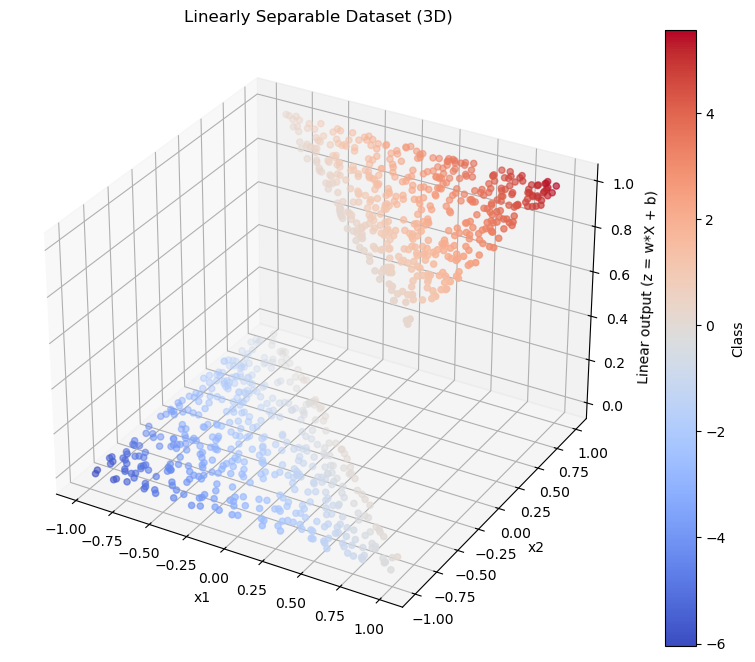

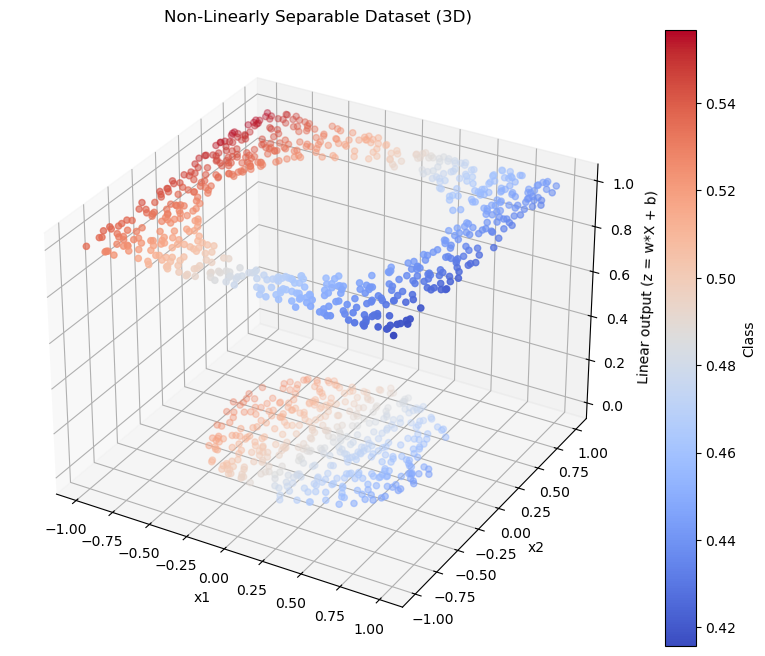

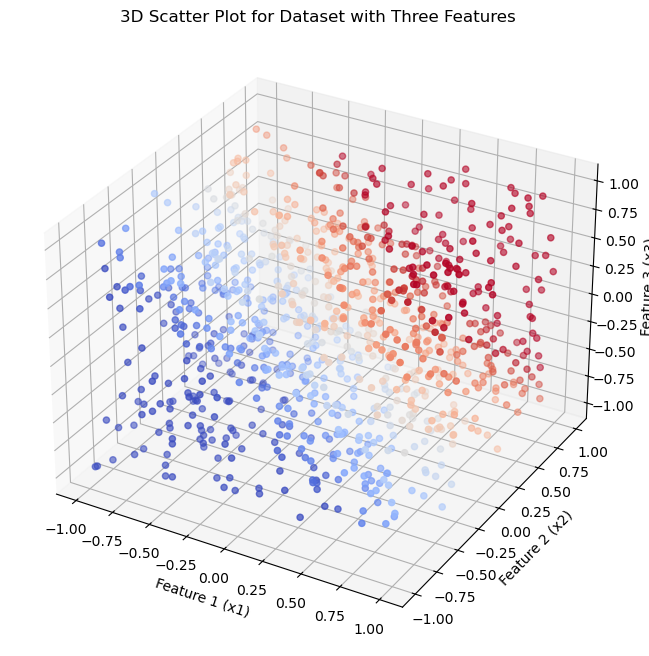

In [156]:
# Compute z-values (linear function output before sigmoid) for each model
z1 = np.dot(X1_train_set, m1.weights) + m1.bias
z2 = np.dot(X2_train_set, m2.weights) + m2.bias
z3 = np.dot(X3_train_set, m3.weights) + m3.bias


plot1_axis(X1_train_set, y1_train_set, z1, "Linearly Separable Dataset (3D)")

plot1_axis(X2_train_set, y2_train_set, z2, "Non-Linearly Separable Dataset (3D)")

plot2_axis(X3_train_set, y3_train_set, z3, "Linearly Separable Dataset (3D)")


### Evaluation on the Validation Set

We create a function called `compute_accuracy` which takes in the number of correct predictions and divides them by the total samples to give an accuracy score.

We observe the Validation dataset accuracies for each of the logistic regression models.

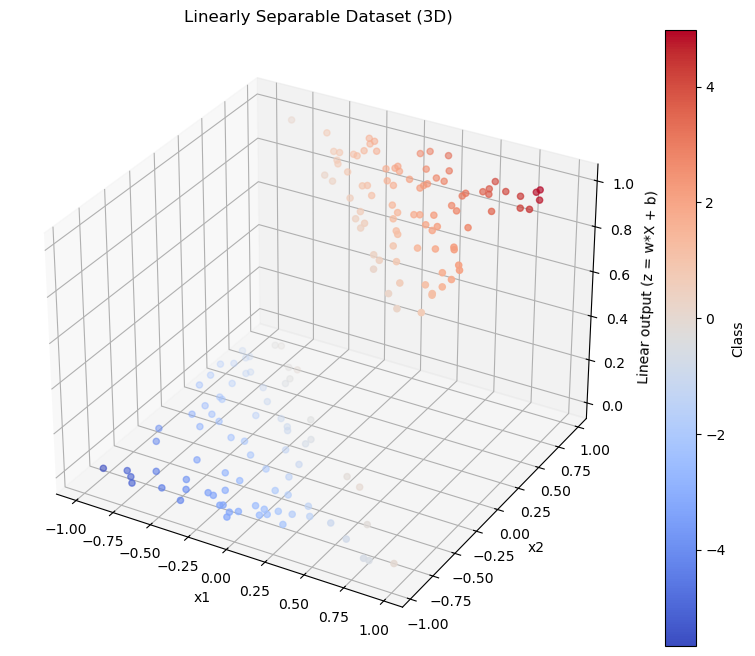

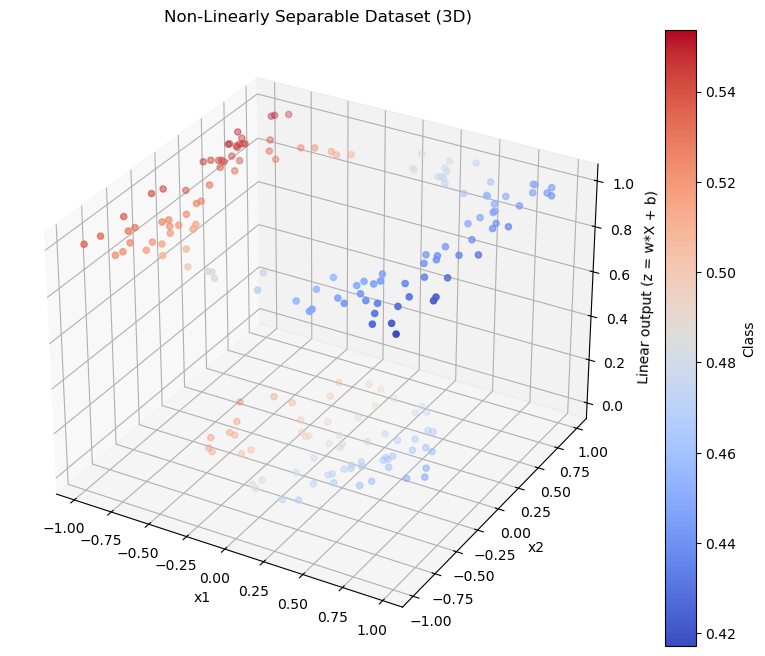

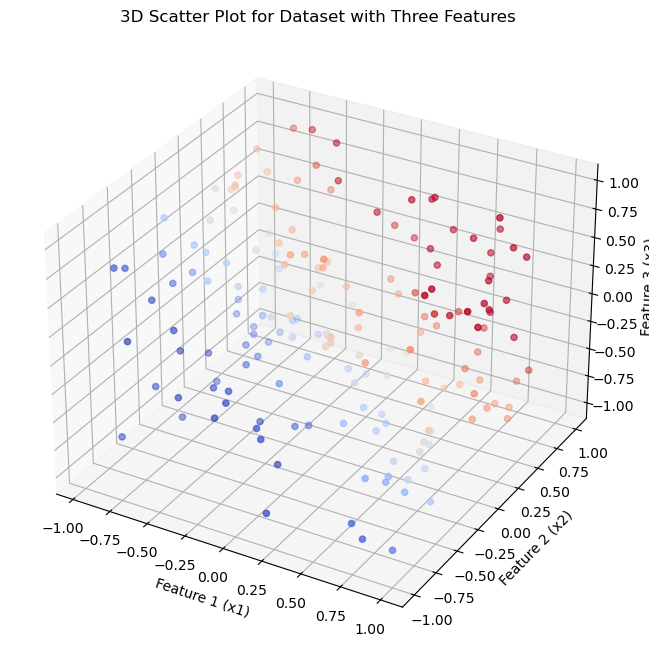

Model 1 Validation Accuracy: 0.9941
Model 2 Validation Accuracy: 0.6615
Model 3 Validation Accuracy: 0.9943


In [159]:
# Compute z-values (linear function output before sigmoid) for each model
z1_val = np.dot(X1_validation_set, m1.weights) + m1.bias
z2_val = np.dot(X2_validation_set, m2.weights) + m2.bias
z3_val = np.dot(X3_validation_set, m3.weights) + m3.bias


plot1_axis(X1_validation_set, y1_validation_set, z1_val, "Linearly Separable Dataset (3D)")

plot1_axis(X2_validation_set, y2_validation_set, z2_val, "Non-Linearly Separable Dataset (3D)")

plot2_axis(X3_validation_set, y3_validation_set, z3_val, "Linearly Separable Dataset (3D)")

# Manually compute accuracy
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    return correct_predictions / total_samples
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute predictions on validation set
y1_val_pred = (sigmoid(z1_val) >= 0.5).astype(int) 
y2_val_pred = (sigmoid(z2_val) >= 0.5).astype(int)
y3_val_pred = (sigmoid(z3_val) >= 0.5).astype(int)


acc1 = compute_accuracy(y1_validation_set, y1_val_pred)
acc2 = compute_accuracy(y2_validation_set, y2_val_pred)
acc3 = compute_accuracy(y3_validation_set, y3_val_pred)

print(f"Model 1 Validation Accuracy: {acc1:.4f}")
print(f"Model 2 Validation Accuracy: {acc2:.4f}")
print(f"Model 3 Validation Accuracy: {acc3:.4f}")


### Evaluation on the Test Set

We observe the Test dataset accuracies for each of the logistic regression models.

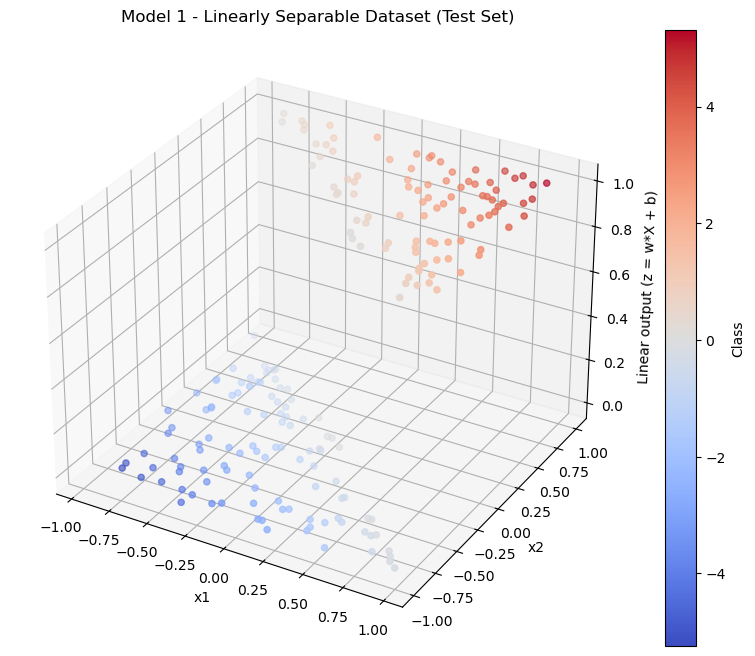

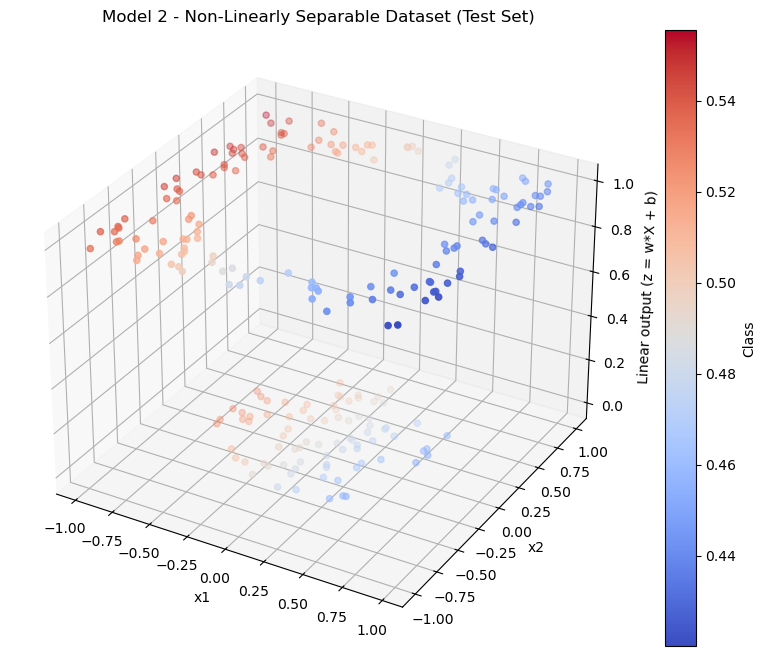

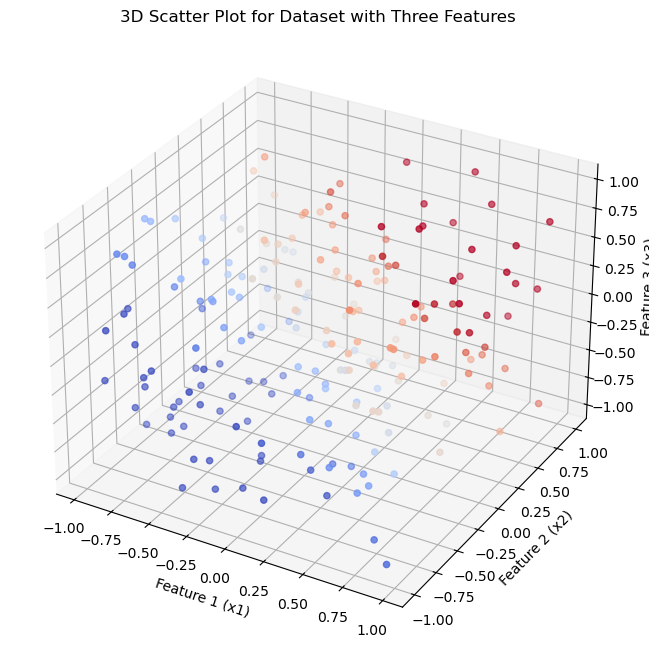

Model 1 Test Accuracy: 0.9950
Model 2 Test Accuracy: 0.6400
Model 3 Test Accuracy: 0.9902


In [162]:
z1_test = np.dot(X1_test_set, m1.weights) + m1.bias
z2_test = np.dot(X2_test_set, m2.weights) + m2.bias
z3_test = np.dot(X3_test_set, m3.weights) + m3.bias

# Plot classification results for test set
plot1_axis(X1_test_set, y1_test_set, z1_test, "Model 1 - Linearly Separable Dataset (Test Set)")
plot1_axis(X2_test_set, y2_test_set, z2_test, "Model 2 - Non-Linearly Separable Dataset (Test Set)")
plot2_axis(X3_test_set, y3_test_set, z3_test, "Model 3 - Linearly Separable Dataset (Test Set)")

# Compute predictions on test set
y1_test_pred = (sigmoid(z1_test) >= 0.5).astype(int)
y2_test_pred = (sigmoid(z2_test) >= 0.5).astype(int)
y3_test_pred = (sigmoid(z3_test) >= 0.5).astype(int)

# Compute accuracy
acc1_test = compute_accuracy(y1_test_set, y1_test_pred)
acc2_test = compute_accuracy(y2_test_set, y2_test_pred)
acc3_test = compute_accuracy(y3_test_set, y3_test_pred)

print(f"Model 1 Test Accuracy: {acc1_test:.4f}")
print(f"Model 2 Test Accuracy: {acc2_test:.4f}")
print(f"Model 3 Test Accuracy: {acc3_test:.4f}")


# Task 3

# Implementing a Shallow Neural Network
The Shallow Neural Network being implemented makes use of the logistic regression functions that have been discussed above. We structure the network to only have 1 hidden layer and 1 output layer.
1. The Shallow Neural Network accepts parameters like the `input_size`, `hidden_size`, `learning_rate`, `epochs` and `activation`.
2. The `activate` function defines 3 types of activation functions which could be used - ReLU, Tanh and sigmoid. In this section we will be using the ReLU activation function for the hidden layers and the `sigmoid` activation function for the output layer.
3. We use the `compute_loss` function to compute the loss as per the formula given during class.
4. We apply a standard Gradient Descent approach for the forward and backward propagations to update the weights and biases.
5. The `predict` function shows the classification results of the model for 1 hidden layer and 1 output layer.

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Shallow Neural Network (1 Hidden Layer, 1 Output Node)
class ShallowNeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000, activation='relu'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def activate(self, Z, derivative=False):
        if self.activation == 'relu':
            return Z * (Z > 0) if derivative else np.maximum(0, Z)
        elif self.activation == 'tanh':
            return 1 - np.tanh(Z)**2 if derivative else np.tanh(Z)
        else:  # Default to sigmoid
            return Z * (1 - Z) if derivative else 1 / (1 + np.exp(-Z))

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def compute_loss(self, y_true, y_pred):
        n = len(y_true)
        return - (1/n) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        m = X.shape[0]

        for epoch in range(self.epochs):
            # Forward propagation
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.activate(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)

            # Compute loss
            loss = self.compute_loss(y, A2)

            # Backpropagation
            dZ2 = A2 - y.reshape(-1, 1)
            dW2 = (1/m) * np.dot(A1.T, dZ2)
            db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.activate(Z1, derivative=True)
            dW1 = (1/m) * np.dot(X.T, dZ1)
            db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

            # Update weights and biases
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.activate(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)
        return (A2 >= 0.5).astype(int)


### Training and Evaluating the Shallow Neural Network

### Model 1

We train the model on the first dataset (linearly seperable) and output the accuracies of the model on the training, validation and test sets.

The output layer uses of the sigmoid activation function.

Evaluating the model using nodes in the hidden layer = 2 and with the ReLU activation function in the hidden layer.

In [169]:
# Train the neural network model on dataset 1
nn_model_1 = ShallowNeuralNetwork(input_size=2, hidden_size=2, learning_rate=0.05, epochs=1000, activation='relu')
nn_model_1.fit(X1_train_set, y1_train_set)

y1_pred_train = nn_model_1.predict(X1_train_set)
y1_pred_val = nn_model_1.predict(X1_validation_set)
y1_pred_test = nn_model_1.predict(X1_test_set)
train_accuracy = np.mean(y1_pred_train == y1_train_set.reshape(-1, 1))
val_accuracy = np.mean(y1_pred_val == y1_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y1_pred_test == y1_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 664.0350
Epoch 100: Loss = 664.0331
Epoch 200: Loss = 664.0329
Epoch 300: Loss = 664.0329
Epoch 400: Loss = 664.0329
Epoch 500: Loss = 664.0329
Epoch 600: Loss = 664.0329
Epoch 700: Loss = 664.0329
Epoch 800: Loss = 664.0329
Epoch 900: Loss = 664.0329
Train Accuracy: 0.5010
Validation Accuracy: 0.5294
Test Accuracy: 0.4700


Evaluating the model using nodes in the hidden layer = 6 and with the Tanh activation function in the hidden layer.

In [171]:
# Train the neural network model on dataset 1
nn_model_1 = ShallowNeuralNetwork(input_size=2, hidden_size=6, learning_rate=0.05, epochs=1000, activation='tanh')
nn_model_1.fit(X1_train_set, y1_train_set)

y1_pred_train = nn_model_1.predict(X1_train_set)
y1_pred_val = nn_model_1.predict(X1_validation_set)
y1_pred_test = nn_model_1.predict(X1_test_set)
train_accuracy = np.mean(y1_pred_train == y1_train_set.reshape(-1, 1))
val_accuracy = np.mean(y1_pred_val == y1_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y1_pred_test == y1_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 664.0350
Epoch 100: Loss = 664.0340
Epoch 200: Loss = 664.1416
Epoch 300: Loss = 671.1718
Epoch 400: Loss = 757.2665
Epoch 500: Loss = 952.8035
Epoch 600: Loss = 1161.5051
Epoch 700: Loss = 1347.9092
Epoch 800: Loss = 1510.5884
Epoch 900: Loss = 1653.7235
Train Accuracy: 0.9916
Validation Accuracy: 1.0000
Test Accuracy: 1.0000


### Model 2

We train the model on the second dataset (non-linearly seperable) and output the accuracies of the model on the training, validation and test sets.

The output layer uses of the sigmoid activation function.

Evaluating the model using nodes in the hidden layer = 2 and with the ReLU activation function in the hidden layer.

In [174]:
# Train the neural network on dataset 2
nn_model_2 = ShallowNeuralNetwork(input_size=2, hidden_size=2, learning_rate=0.01, epochs=1000, activation='relu')
nn_model_2.fit(X2_train_set, y2_train_set)

y2_pred_train = nn_model_2.predict(X2_train_set)
y2_pred_val = nn_model_2.predict(X2_validation_set)
y2_pred_test = nn_model_2.predict(X2_test_set)
train_accuracy = np.mean(y2_pred_train == y2_train_set.reshape(-1, 1))
val_accuracy = np.mean(y2_pred_val == y2_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y2_pred_test == y2_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 750.6813
Epoch 100: Loss = 738.4812
Epoch 200: Loss = 731.0755
Epoch 300: Loss = 726.5672
Epoch 400: Loss = 723.8132
Epoch 500: Loss = 722.1251
Epoch 600: Loss = 721.0871
Epoch 700: Loss = 720.4473
Epoch 800: Loss = 720.0519
Epoch 900: Loss = 719.8071
Train Accuracy: 0.6196
Validation Accuracy: 0.6615
Test Accuracy: 0.6400


Evaluating the model using nodes in the hidden layer = 6 and with the Tanh activation function in the hidden layer.

In [176]:
# Train the neural network on dataset 2
nn_model_2 = ShallowNeuralNetwork(input_size=2, hidden_size=6, learning_rate=0.01, epochs=1000, activation='tanh')
nn_model_2.fit(X2_train_set, y2_train_set)

y2_pred_train = nn_model_2.predict(X2_train_set)
y2_pred_val = nn_model_2.predict(X2_validation_set)
y2_pred_test = nn_model_2.predict(X2_test_set)
train_accuracy = np.mean(y2_pred_train == y2_train_set.reshape(-1, 1))
val_accuracy = np.mean(y2_pred_val == y2_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y2_pred_test == y2_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 750.6785
Epoch 100: Loss = 738.4752
Epoch 200: Loss = 731.0692
Epoch 300: Loss = 726.5617
Epoch 400: Loss = 723.8087
Epoch 500: Loss = 722.1217
Epoch 600: Loss = 721.0846
Epoch 700: Loss = 720.4454
Epoch 800: Loss = 720.0506
Epoch 900: Loss = 719.8062
Train Accuracy: 0.6196
Validation Accuracy: 0.6615
Test Accuracy: 0.6400


### Model 3

We train the model on the third dataset (3D features) and output the accuracies of the model on the training, validation and test sets. 

The output layer uses of the sigmoid activation function.

Evaluating the model using nodes in the hidden layer = 2 and with the ReLU activation function in the hidden layer.

In [179]:
# Train the neural network on dataset 3
nn_model_3 = ShallowNeuralNetwork(input_size=3, hidden_size=2, learning_rate=0.1, epochs=1000, activation='relu')
nn_model_3.fit(X3_train_set, y3_train_set)

y3_pred_train = nn_model_3.predict(X3_train_set)
y3_pred_val = nn_model_3.predict(X3_validation_set)
y3_pred_test = nn_model_3.predict(X3_test_set)
train_accuracy = np.mean(y3_pred_train == y3_train_set.reshape(-1, 1))
val_accuracy = np.mean(y3_pred_val == y3_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y3_pred_test == y3_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 682.7500
Epoch 100: Loss = 682.7495
Epoch 200: Loss = 682.7495
Epoch 300: Loss = 682.7495
Epoch 400: Loss = 682.7495
Epoch 500: Loss = 682.7495
Epoch 600: Loss = 682.7495
Epoch 700: Loss = 682.7496
Epoch 800: Loss = 682.7498
Epoch 900: Loss = 682.7504
Train Accuracy: 0.8355
Validation Accuracy: 0.7816
Test Accuracy: 0.8439


Evaluating the model using nodes in the hidden layer = 6 and with the Tanh activation function in the hidden layers.

In [181]:
# Train the neural network on dataset 3
nn_model_3 = ShallowNeuralNetwork(input_size=3, hidden_size=6, learning_rate=0.1, epochs=1000, activation='tanh')
nn_model_3.fit(X3_train_set, y3_train_set)

y3_pred_train = nn_model_3.predict(X3_train_set)
y3_pred_val = nn_model_3.predict(X3_validation_set)
y3_pred_test = nn_model_3.predict(X3_test_set)
train_accuracy = np.mean(y3_pred_train == y3_train_set.reshape(-1, 1))
val_accuracy = np.mean(y3_pred_val == y3_validation_set.reshape(-1, 1))
test_accuracy = np.mean(y3_pred_test == y3_test_set.reshape(-1, 1))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0: Loss = 682.7500
Epoch 100: Loss = 682.7695
Epoch 200: Loss = 733.4508
Epoch 300: Loss = 1178.9283
Epoch 400: Loss = 1585.1911
Epoch 500: Loss = 1891.1592
Epoch 600: Loss = 2135.9588
Epoch 700: Loss = 2341.3310
Epoch 800: Loss = 2519.2707
Epoch 900: Loss = 2676.9755
Train Accuracy: 0.9970
Validation Accuracy: 0.9943
Test Accuracy: 0.9951


# Part 2

The code below loads your dataset and formats your images as NumPy arrays, making them easy to process with shallow neural networks. You're also provided with the function `visualize_samples` to visualize sample images and their labels.

You need to unzip the `mini_frontal_dataset.zip` and `full_facial_dataset.zip` files to work with them.

After unziping, expect to see:

for `mini_frontal_dataset.zip` the folder structure below:
###### `mini_frontal_dataset`/
###### ├── `train`/
###### │   ├── `class 1`/
###### │   ├── `class 2`/
###### │   ├──`...`/
###### ├── `test`/

In this case the dataset_path to load say the `train` will be `path/to/mini_frontal_dataset/train`

In [183]:
!pip install tensorflow

## Reading the Dataset - Mini Frontal Dataset




In [185]:
import os
import numpy as np
import cv2
import random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset path
dataset_path_train = "mini_frontal_dataset/mini_frontal_dataset/Train"
dataset_path_test = "mini_frontal_dataset/mini_frontal_dataset/Test" # Change this to your dataset folder
image_size = (48, 48)  # Resize images to this shape , this can be changed if you want

X = []  # Image data
y = []  # Labels
class_names = sorted(os.listdir(dataset_path_train))  # Get class names in sorted order
class_mapping = {name: idx for idx, name in enumerate(class_names)}  # Assign a numerical label

# Load images and labels
for category in class_names:
    category_path = os.path.join(dataset_path_train, category)

    if os.path.isdir(category_path):  # Ensure it's a folder
        for img_name in os.listdir(category_path):
          if img_name=='.DS_Store':
            continue
          img_path = os.path.join(category_path, img_name)
          #print(img_name)
          # Read image and preprocess
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
          img = cv2.resize(img, image_size)  # Resize
          img = img.astype("float32") / 255.0  # Normalize pixel values

          X.append(img)  # Append image
          y.append(class_mapping[category])  # Append label

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshape for CNN input (batch, height, width, channels)
X = X.reshape(-1, image_size[0], image_size[1], 1)

# One-hot encode labels
num_classes = len(class_names)

y = to_categorical(y, num_classes)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset info
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]} (height, width, channels)")
print(f"Number of classes: {num_classes}")


Training samples: 323, Testing samples: 81
Image shape: (48, 48, 1) (height, width, channels)
Number of classes: 13


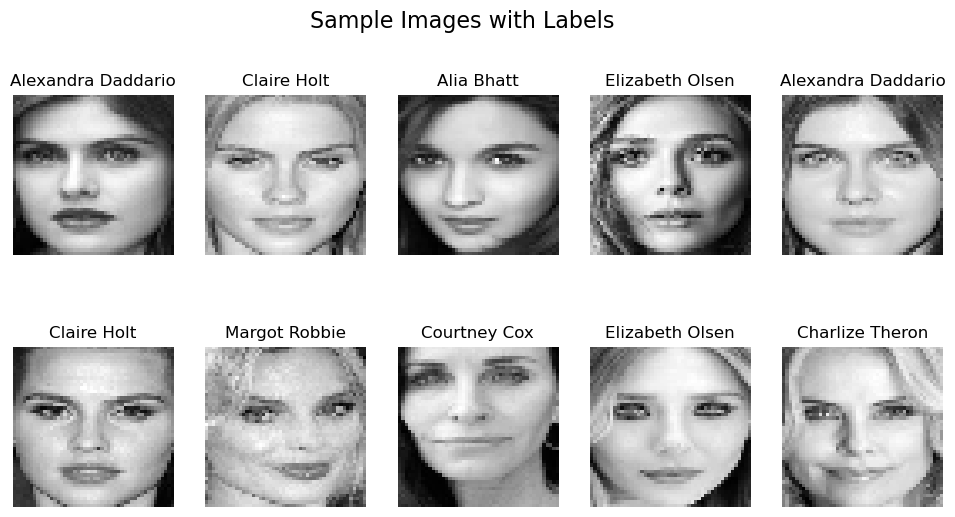

In [186]:
import matplotlib.pyplot as plt

# Function to visualize sample images with labels
def visualize_samples(X, y, class_names, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns
    axes = axes.ravel()

    indices = np.random.choice(len(X), num_samples, replace=False)  # Random selection

    for i, idx in enumerate(indices):
        img = X[idx].squeeze()  # Remove extra channel dimension
        label = np.argmax(y[idx])  # Get class index from one-hot encoding

        axes[i].imshow(img, cmap="gray")  # Display grayscale image
        axes[i].set_title(class_names[label])  # Show class name
        axes[i].axis("off")  # Hide axes

    plt.suptitle("Sample Images with Labels", fontsize=16)
    plt.show()

# Call the function to visualize training set images
visualize_samples(X_train, y_train, class_names)


# Task 1

### Using the model from Part 1

This version of the Shallow Neural Network has been changed slightly so as to facilitate the use of image data
1. We use the variable `hidden_size` to take in a single layer with specifying the number of nodes in the layer as an integer value.
2. We use the Gradient Descent algorithm as we used in Part 1 to see how it would perform on this dataset.
3. We use the `softmax` function is the output layer to give us a classification of the results.
4. The loss function is computed using the `compute_loss` function.
5. The activation functions in the hidden layer can be either relu, tanh or sigmoid. Depends on what the user wishes to use. The function `activation` generates the code for each of these activation functions. In this notebook we will be using the tanh activation function.


In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Shallow Neural Network (1 Hidden Layer, 1 Output Node)
class ShallowNeuralNetwork_1:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000, activation='relu'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size  # Multi-class output
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation

        # Initialize weights and biases

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def activate(self, Z, derivative=False):
        if self.activation == 'relu':
            return Z * (Z > 0) if derivative else np.maximum(0, Z)
        elif self.activation == 'tanh':
            return 1 - np.tanh(Z)**2 if derivative else np.tanh(Z)
        else:  # Default to sigmoid
            return Z * (1 - Z) if derivative else 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
        return exp_Z / np.sum(exp_Z, axis = 1, keepdims = True)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def compute_loss(self, y_true, y_pred):
        n = len(y_true)
        return - ((1/n) * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8)))

    def fit(self, X, y):
        m = X.shape[0]
        self.losses = [] # Store losses for plotting

        
        # Start epochs from 1
        for epoch in range(self.epochs):
                
            # Forward propagation
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.activate(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.softmax(Z2)

            # Compute loss
            loss = self.compute_loss(y, A2)
            self.losses.append(loss)
    
            # Backpropagation
            dZ2 = A2 - y # Gradient of Softmax loss
            dW2 = (1/m) * np.dot(A1.T, dZ2)
            db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.activate(Z1, derivative=True)
            dW1 = (1/m) * np.dot(X.T, dZ1)
            db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
            # Update weights and biases
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
    
                
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

            

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.activate(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        return np.argmax(A2, axis = 1) # Get class with highest probability

    

### Training model on the dataset - Mini Frontal Dataset

In [192]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


inp = X_train_flat.shape[1]
out = y_train.shape[1]
nn_model_1 = ShallowNeuralNetwork_1(input_size = inp , hidden_size=128, output_size = out, learning_rate=0.005, epochs=1000, activation='tanh')
nn_model_1.fit(X_train_flat, y_train)
                                  

Epoch 0: Loss = 3.5223
Epoch 100: Loss = 3.4263
Epoch 200: Loss = 3.3874
Epoch 300: Loss = 3.3562
Epoch 400: Loss = 3.3119
Epoch 500: Loss = 3.2448
Epoch 600: Loss = 3.1561
Epoch 700: Loss = 3.0599
Epoch 800: Loss = 2.9706
Epoch 900: Loss = 2.8924


### Training Loss Curve

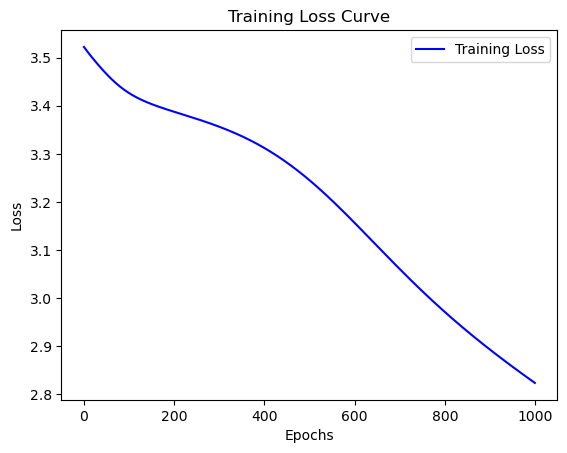

In [194]:
# Plot training loss
import matplotlib.pyplot as plt

plt.plot(nn_model_1.losses, label = "Training Loss", color = "blue")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

Using the `compute_accuracy` function to determine the accuracy of the model on the test set.

In [196]:
# Get model predictions
y_pred = nn_model_1.predict(X_test_flat)

# Convert one-hot encoded labels back to class indices
y_true = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = compute_accuracy(y_true, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 25.93%


# Task 2

We improve the above Shallow Neural Network and make our Deep Neural Network by making a few changes,

1. We amend the code so that multiple hidden layers could be added by specifying the number of nodes in each layer in an array called `hidden_size`. We alter the forward and backpropagation steps to make it suitable for having multiple layers by keeping track of the activations and pre-activations at each layer.
2. We implement Stochastic Gradient Descent instead of conventional Gradient Descent for the backpropagation as this helps us train more efficiently and gives us a better accuracy.
3. We implement the dropout technique by specifying the `dropout_rate` and adding that into the forward propagation part of the code. This technique helps us avoid overfitting of the code.
4. The `predict` function generates the classification results of the model and has been altered slightly with regards to the previous implementation in Part 1 to facilitate the changes made to the forward and backward propagations.

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# dEEP Neural Network 
class DeepNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000, activation='relu', dropout_rate = 0.0):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size  # Multi-class output
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation
        self.dropout_rate = dropout_rate # Dropout rate

        # Initialize weights and biases
        self.weights = []
        self.biases = []
        prev_size = input_size
        for size in hidden_size:
            self.weights.append(np.random.randn(prev_size, size) * 0.01)
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        self.weights.append(np.random.randn(prev_size, output_size) * 0.01)
        self.biases.append(np.zeros((1, output_size)))

    def activate(self, Z, derivative=False):
        if self.activation == 'relu':
            return Z * (Z > 0) if derivative else np.maximum(0, Z)
        elif self.activation == 'tanh':
            return 1 - np.tanh(Z)**2 if derivative else np.tanh(Z)
        else:  # Default to sigmoid
            return Z * (1 - Z) if derivative else 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
        return exp_Z / np.sum(exp_Z, axis = 1, keepdims = True)

    def compute_loss(self, y_true, y_pred):
        n = len(y_true)
        return - ((1/n) * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8)))

    def fit(self, X, y):
        m = X.shape[0]
        self.losses = [] # Store losses for plotting

        
        # Start epochs from 1
        for epoch in range(self.epochs):
            # Stochastic Gradient Descent
            epoch_loss = 0

            for i in range(m):
                xi = X[i, :].reshape(1, -1)
                yi = y[i, :].reshape(1, -1)

                activations = [xi]
                pre_activations = []

                # Forward Propagation
                for l in range(len(self.hidden_size)):
                    Z = np.dot(activations[-1], self.weights[l]) + self.biases[l]
                    pre_activations.append(Z)
                    A = self.activate(Z)

                    #Implement the Dropout Technique
                    if self.dropout_rate > 0 and l < len(self.hidden_size):
                        dropout_mask = np.random.rand(*A.shape) < (1 - self.dropout_rate)
                        A *= dropout_mask
                        A /= (1 - self.dropout_rate)
                    
                    activations.append(A)
                
                Z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
                A_out = self.softmax(Z_out)   # Softmax in the output layer
                activations.append(A_out)

                # Compute loss
                loss = -(np.sum(yi * np.log(A_out + 1e-8) + (1 - yi) * np.log(1 - A_out + 1e-8)))
                epoch_loss += loss
    
                # Backpropagation
                dA = A_out - yi  # Gradient of softmax loss

                # Backpropagate for the output layer
                dZ = dA
                dW = np.dot(activations[-2].T, dZ)
                db = np.sum(dZ, axis=0, keepdims=True)

                # Update weights and biases for the output layer
                self.weights[-1] -= self.learning_rate * dW
                self.biases[-1] -= self.learning_rate * db

                # Backpropagate for hidden layers
                for l in range(len(self.hidden_size) - 1, -1, -1):
                    dA = np.dot(dZ, self.weights[l + 1].T)
                    dZ = dA * self.activate(pre_activations[l], derivative=True)
                    dW = np.dot(activations[l].T, dZ)
                    db = np.sum(dZ, axis=0, keepdims=True)

                    
                    # Update weights and biases
                    self.weights[l] -= self.learning_rate * dW
                    self.biases[l] -= self.learning_rate * db

    
            # Average loss for this epoch
            avg_epoch_loss = epoch_loss / m
            self.losses.append(avg_epoch_loss)
                
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {avg_epoch_loss:.4f}")

            

    def predict(self, X):
        activations = [X]
        for l in range(len(self.hidden_size)):
            Z = np.dot(activations[-1], self.weights[l]) + self.biases[l]
            A = self.activate(Z)
            activations.append(A)

        Z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        A_out = self.softmax(Z_out)
        return np.argmax(A_out, axis=1)

    

### Training the Deep Neural Network on the Mini-Frontal Dataset

In [201]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


inp = X_train_flat.shape[1]
out = y_train.shape[1]
nn_model_2 = DeepNeuralNetwork(input_size = inp , hidden_size=[128, 64, 32], output_size = out, learning_rate=0.005, epochs=500, activation='tanh', dropout_rate = 0.5)
nn_model_2.fit(X_train_flat, y_train)

Epoch 0: Loss = 3.5169
Epoch 100: Loss = 2.7907
Epoch 200: Loss = 1.9700
Epoch 300: Loss = 1.8996
Epoch 400: Loss = 1.5837


### Training Loss Curve

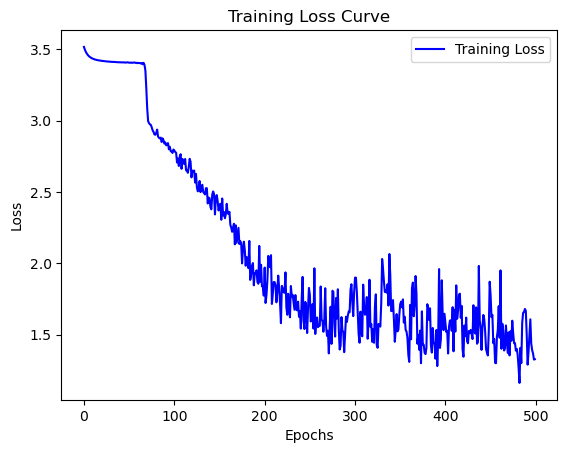

In [203]:
# Plot training loss
import matplotlib.pyplot as plt

plt.plot(nn_model_2.losses, label = "Training Loss", color = "blue")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

Using the `compute_accuracy` function to determine the accuracy of the model on the test set.

In [205]:
# Get model predictions
y_pred = nn_model_2.predict(X_test_flat)

# Convert one-hot encoded labels back to class indices
y_true = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = compute_accuracy(y_true, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 54.32%


We can see that with an increased number of layers as well as using the Dropout technique to handle overfitting the accuracy has increased by over 30% as compared to the previous execution of the model with a single hidden layer and no techniques to avoid overfitting.

## Task 3

In [242]:
import os
import numpy as np
import cv2
import random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset path
dataset_path_train = "Full_facial_dataset/full_facial_dataset"
image_size = (48, 48)  # Resize images to this shape , this can be changed if you want

X = []  # Image data
y = []  # Labels
class_names = sorted(os.listdir(dataset_path_train))  # Get class names in sorted order
class_mapping = {name: idx for idx, name in enumerate(class_names)}  # Assign a numerical label

# Load images and labels
for category in class_names:
    category_path = os.path.join(dataset_path_train, category)

    if os.path.isdir(category_path):  # Ensure it's a folder
        for img_name in os.listdir(category_path):
          if img_name=='.DS_Store':
            continue
          img_path = os.path.join(category_path, img_name)
          #print(img_name)
          # Read image and preprocess
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
          img = cv2.resize(img, image_size)  # Resize
          img = img.astype("float32") / 255.0  # Normalize pixel values

          X.append(img)  # Append image
          y.append(class_mapping[category])  # Append label

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshape for CNN input (batch, height, width, channels)
X = X.reshape(-1, image_size[0], image_size[1], 1)

# One-hot encode labels
num_classes = len(class_names)

y = to_categorical(y, num_classes)

# Split into train and test sets
X_train_task3, X_test_task3, y_train_task3, y_test_task3 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset info
print(f"Training samples: {X_train_task3.shape[0]}, Testing samples: {X_test_task3.shape[0]}")
print(f"Image shape: {X_train_task3.shape[1:]} (height, width, channels)")
print(f"Number of classes: {num_classes}")


Training samples: 2049, Testing samples: 513
Image shape: (48, 48, 1) (height, width, channels)
Number of classes: 32


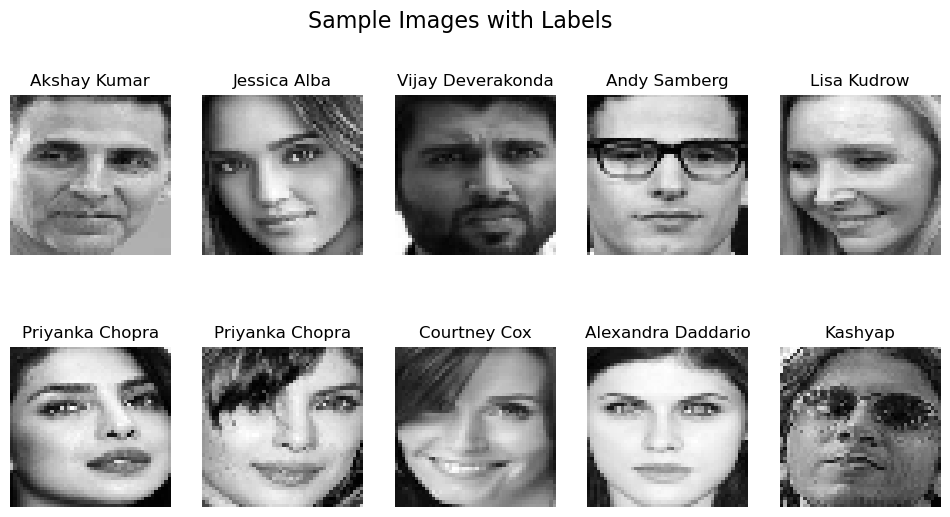

In [244]:
import matplotlib.pyplot as plt

# Function to visualize sample images with labels
def visualize_samples(X, y, class_names, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns
    axes = axes.ravel()

    indices = np.random.choice(len(X), num_samples, replace=False)  # Random selection

    for i, idx in enumerate(indices):
        img = X[idx].squeeze()  # Remove extra channel dimension
        label = np.argmax(y[idx])  # Get class index from one-hot encoding

        axes[i].imshow(img, cmap="gray")  # Display grayscale image
        axes[i].set_title(class_names[label])  # Show class name
        axes[i].axis("off")  # Hide axes

    plt.suptitle("Sample Images with Labels", fontsize=16)
    plt.show()

# Call the function to visualize training set images
visualize_samples(X_train_task3, y_train_task3, class_names)

### Training the Deep Neural Network model on the Full Facial Dataset

In [248]:
X_train_flat_task3 = X_train_task3.reshape(X_train_task3.shape[0], -1)
X_test_flat_task3 = X_test_task3.reshape(X_test_task3.shape[0], -1)


inp = X_train_flat_task3.shape[1]
out = y_train_task3.shape[1]
nn_model_3 = DeepNeuralNetwork(input_size = inp , hidden_size=[128, 64, 32], output_size = out, learning_rate=0.005, epochs=500, activation='tanh', dropout_rate = 0.5)
nn_model_3.fit(X_train_flat_task3, y_train_task3)

Epoch 0: Loss = 4.4368
Epoch 100: Loss = 4.4597
Epoch 200: Loss = 4.4622
Epoch 300: Loss = 4.4652
Epoch 400: Loss = 4.4690


### Training Loss Curve

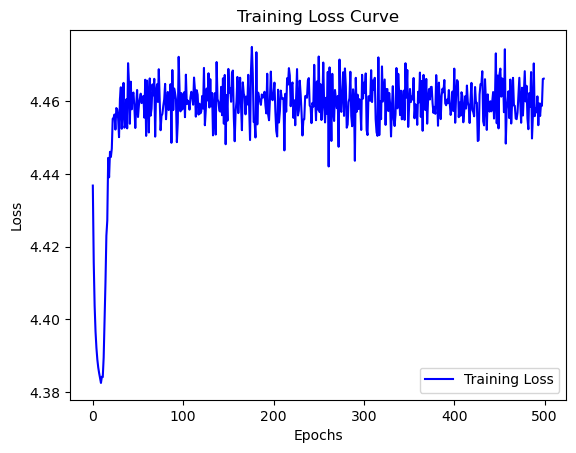

In [255]:
# Plot training loss
import matplotlib.pyplot as plt

plt.plot(nn_model_3.losses, label = "Training Loss", color = "blue")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

### Accuracy of Deep Neural Network Model on the Full Facial Dataset

In [260]:
# Get model predictions
y_pred_task3 = nn_model_3.predict(X_test_flat_task3)

# Convert one-hot encoded labels back to class indices
y_true_task3 = np.argmax(y_test_task3, axis=1)

# Compute accuracy
accuracy = compute_accuracy(y_true_task3, y_pred_task3) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 4.48%
